### Load Packages

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn packages
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,chi2

# keras packages
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings("ignore")

### Load data and display a sample

In [2]:
data = pd.read_csv('steel.csv')
data.sample(10)
# data.columns

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
711,85,209,7275798,7275852,4239,150,76,456305,65,127,...,-0.5645,-0.1590,1.0000,0,0,1,0,0,0,0
1255,1122,1134,313348,313360,119,16,12,10350,56,111,...,0.0000,-0.3205,0.2583,0,0,0,0,0,1,0
529,39,187,2662727,2662812,6397,381,216,701931,55,141,...,-0.4257,-0.1427,1.0000,0,0,1,0,0,0,0
1096,362,388,2839568,2839625,1015,49,59,105560,76,132,...,0.5439,-0.1875,0.9996,0,0,0,0,0,1,0
1482,259,270,88576,88613,204,28,37,16370,71,93,...,0.7027,-0.3731,0.6678,0,0,0,0,0,0,1
96,1058,1066,367429,367455,135,18,26,15385,103,126,...,0.6923,-0.1097,0.3479,1,0,0,0,0,0,0
515,41,199,2421293,2421350,5593,239,133,593650,42,127,...,-0.6392,-0.1708,1.0000,0,0,1,0,0,0,0
775,321,329,679386,679391,17,12,5,2193,121,140,...,-0.3750,0.0078,0.1483,0,0,0,1,0,0,0
1557,99,129,2634035,2634039,75,30,7,9556,104,149,...,-0.8667,-0.0046,0.2288,0,0,0,0,0,0,1
1522,0,5,286956,287014,148,8,58,14298,61,121,...,0.9138,-0.2453,0.4796,0,0,0,0,0,0,1


### EDA

IndexError: index 3 is out of bounds for axis 0 with size 3

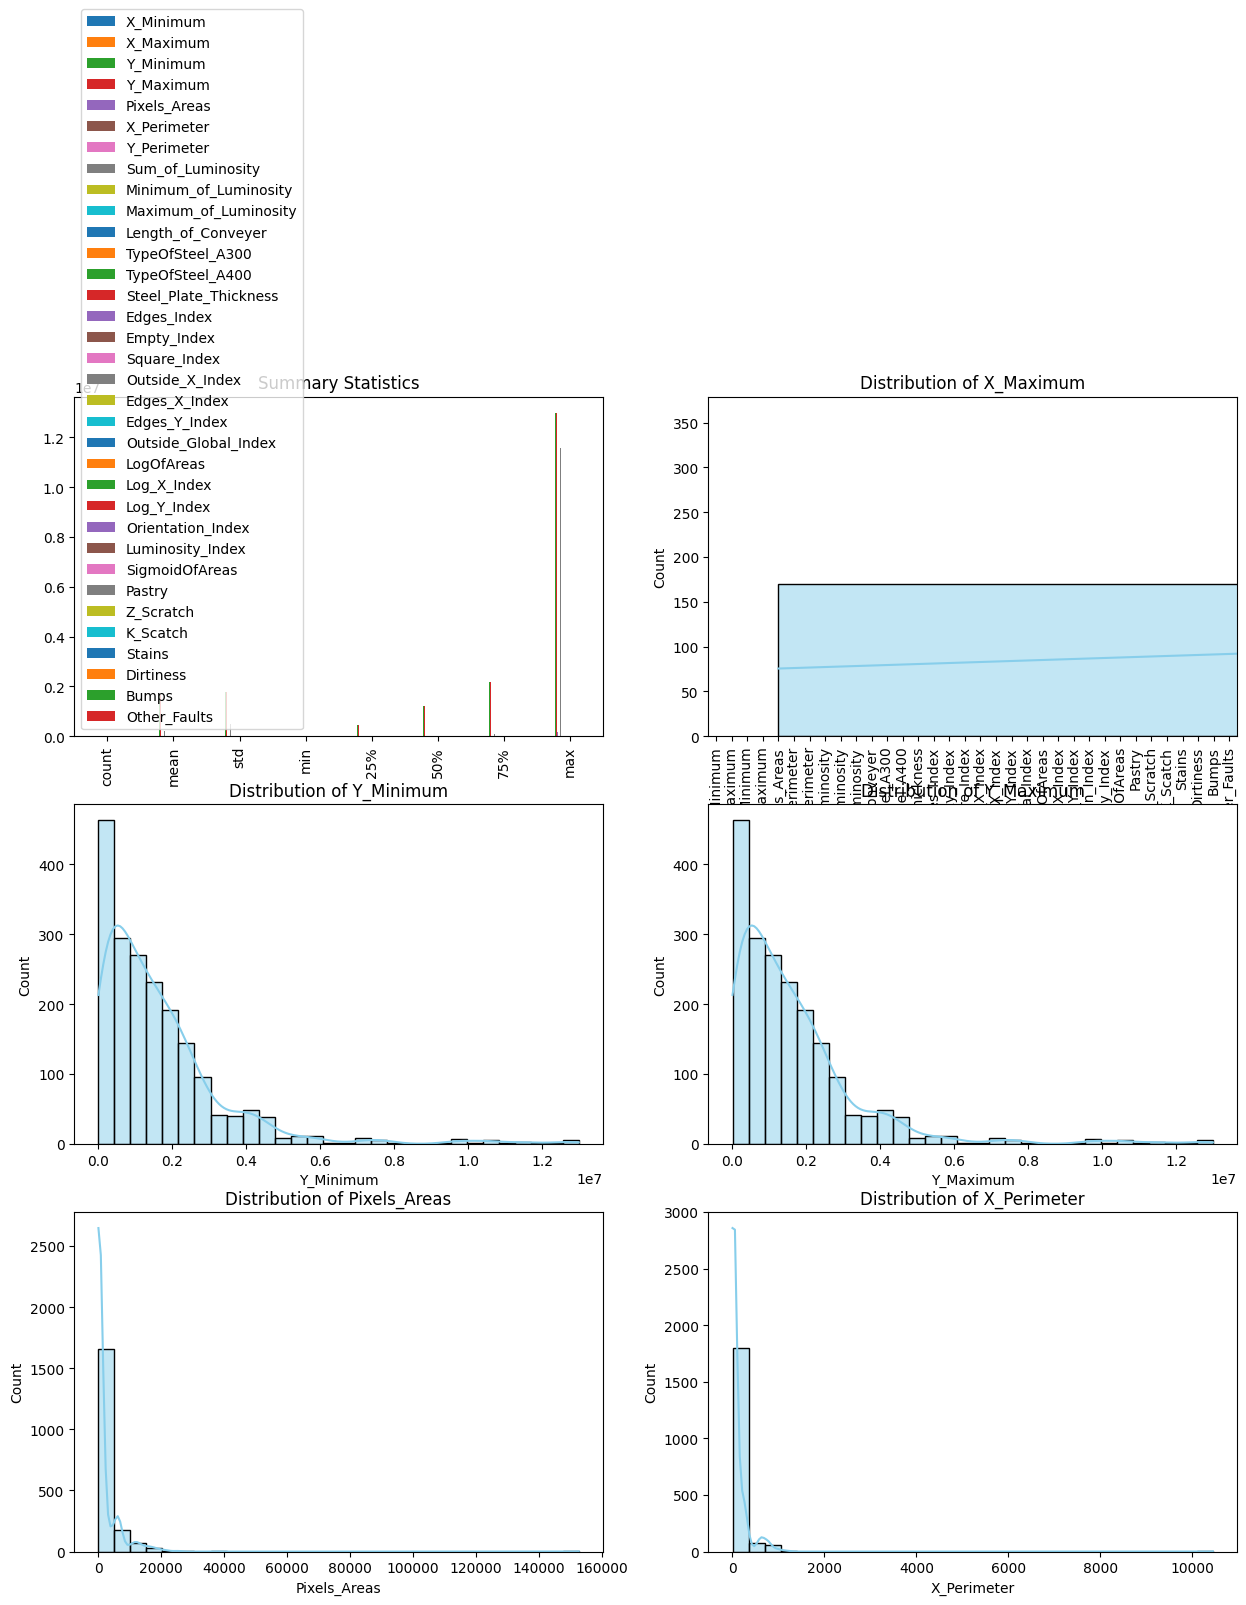

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up subplots for visualizations
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Summary statistics of the dataset
data.describe().plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Summary Statistics')

# Check for any missing values
data.isnull().sum().plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Missing Values')

# Visualize the distribution of each feature
for i, column in enumerate(data.columns[1:]):
    sns.histplot(data[column], kde=True, bins=30, color='skyblue', ax=axes[(i+1)//2, (i+1) % 2])
    axes[(i+1)//2, (i+1) % 2].set_title(f'Distribution of {column}')

# Visualize the correlation between features
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[2, 0])
axes[2, 0].set_title('Correlation Matrix')

# Visualize the relationship between features and the target variables
for i, column in enumerate(data.columns[-7:]):
    sns.countplot(x=column, data=data, ax=axes[2, 1])
    axes[2, 1].set_title(f'Count of {column}')

plt.tight_layout()
plt.show()


### Detect Outliers and remove them

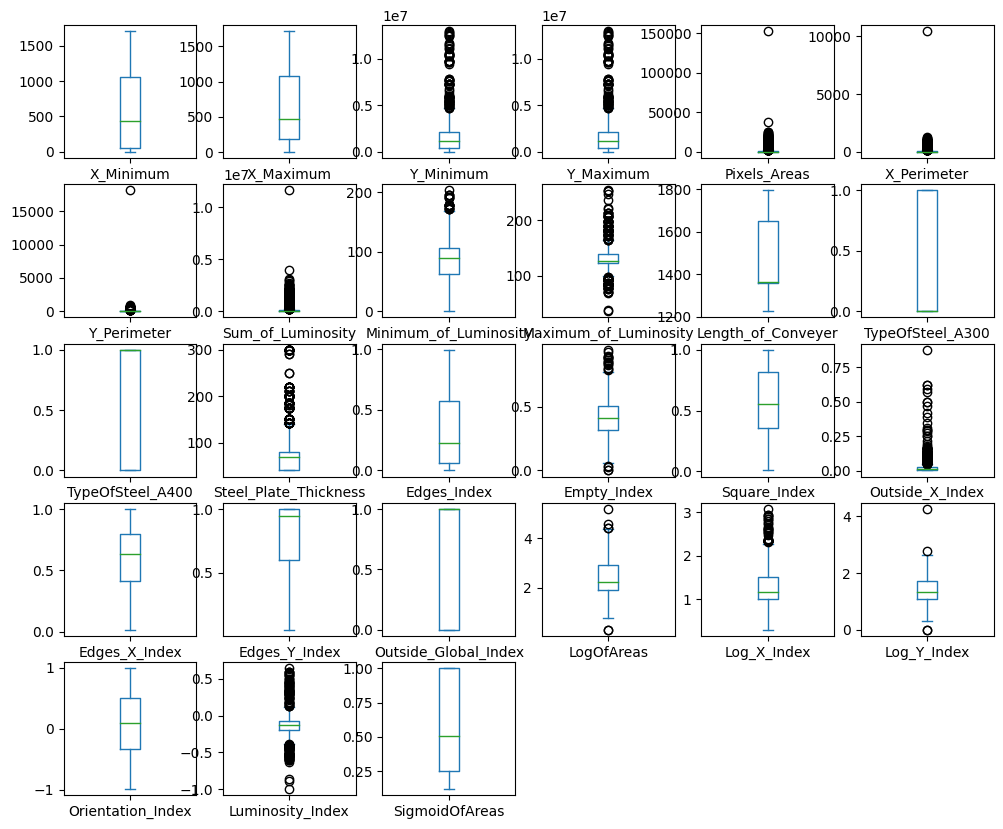

In [24]:
features = data.columns[:-7]
data[features].plot(kind='box',subplots=True,layout=(5,6),figsize=(12,10))
plt.show()

### Show Balance of Labels

<AxesSubplot: >

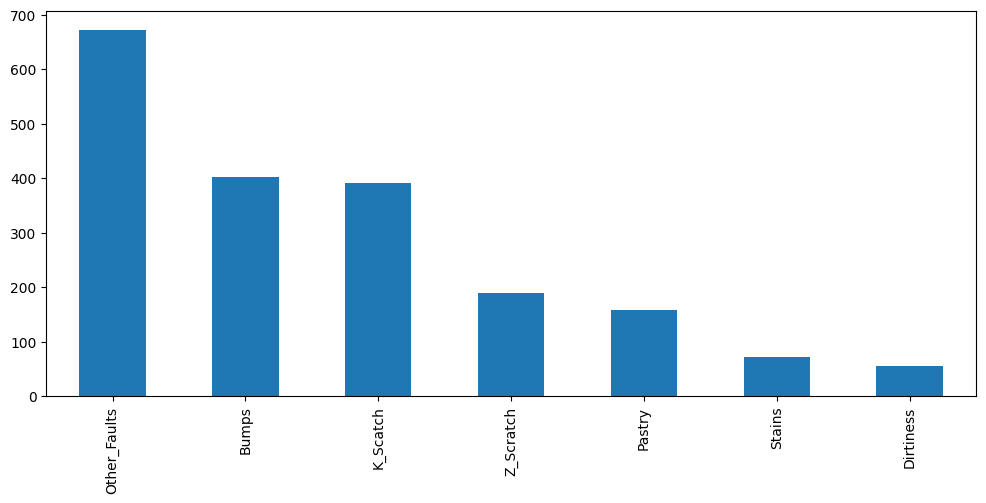

In [4]:
features = data.columns[:-7]
labels = data.columns[-7:]
X = data[features]
y = data[labels]
y.idxmax(axis=1).value_counts().plot(kind='bar',figsize=(12,5))

### Feature Scaling and split into train and test dataset

In [92]:
# Scale data
scaler = MinMaxScaler()
data_s = scaler.fit_transform(data)
data_s = pd.DataFrame(data_s,columns=data.columns)

# Split data into X and y
features = data.columns[:-7]
labels = data.columns[-7:]
X = data_s[features]
y = data_s[labels]

# Train/test split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2,shuffle=True)

### Select Best Features

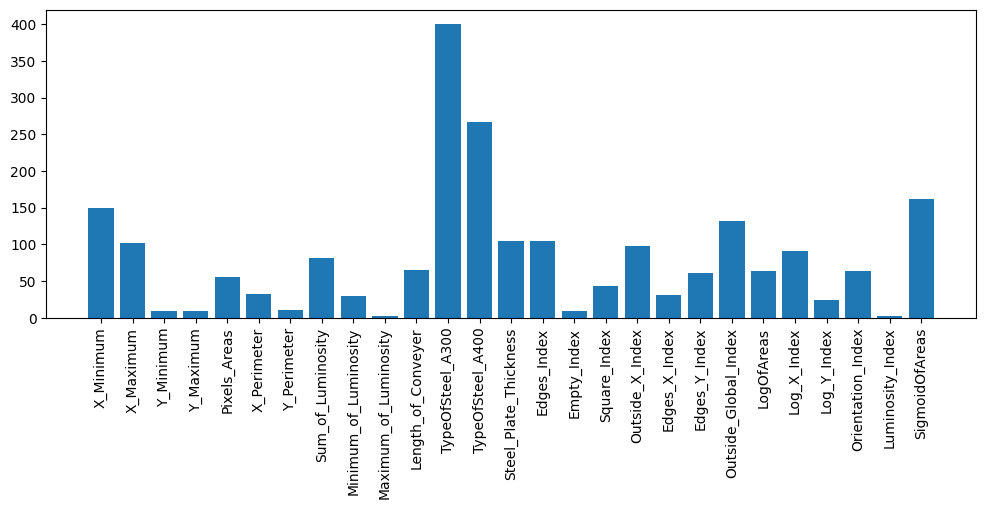

In [93]:
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)
plt.figure(figsize=(12,4))
plt.bar(x=X.columns,height=fit.scores_,)
plt.xticks(rotation=90);

### Cross Validation

In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    X, y, random_state=0, stratify=y)

print(x_train.shape,x_test.shape)

(1455, 27) (486, 27)


### Scikit-Learn Classifiers

In [40]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [41]:
from sklearn.multioutput import MultiOutputClassifier

### Create Models

In [42]:
ada = AdaBoostClassifier()
lr = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svc = SVC()
clist = [ada,lr,nb,knn,dt,rf,svc]
mlist = [None]*7

### Train Models

In [43]:
for i,m in enumerate(clist):
    mlist[i] = MultiOutputClassifier(m).fit(Xtrain,ytrain)

In [51]:
from sklearn.metrics import classification_report

for i, m in enumerate(mlist):
    predictions = m.predict(Xtest)
    print(f"Evaluation for Model {i+1}:")
    print(classification_report(ytest, predictions))


Evaluation for Model 1:
              precision    recall  f1-score   support

           0       0.76      0.55      0.64        29
           1       0.78      0.82      0.80        44
           2       0.95      0.96      0.95        72
           3       0.88      1.00      0.93        14
           4       0.80      0.89      0.84         9
           5       0.62      0.53      0.57        75
           6       0.75      0.52      0.62       146

   micro avg       0.78      0.67      0.72       389
   macro avg       0.79      0.75      0.76       389
weighted avg       0.77      0.67      0.71       389
 samples avg       0.64      0.67      0.65       389

Evaluation for Model 2:
              precision    recall  f1-score   support

           0       0.62      0.17      0.27        29
           1       0.82      0.82      0.82        44
           2       0.95      0.86      0.91        72
           3       0.91      0.71      0.80        14
           4       0.00      0

In [53]:
models = [AdaBoostClassifier(), LogisticRegression(), GaussianNB(), KNeighborsClassifier(),
          DecisionTreeClassifier(), RandomForestClassifier(), SVC()]

for i, m in enumerate(models):
    multi_model = MultiOutputClassifier(m)
    multi_model.fit(Xtrain, ytrain)

    # Demo prediction on test data
    y_pred = multi_model.predict(Xtest)

    print(f"Predictions for Model {i+1}:")
    print(y_pred[:5])  # Print the first 5 predictions

Predictions for Model 1:
[[0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0.]]
Predictions for Model 2:
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0.]]
Predictions for Model 3:
[[0. 0. 0. 0. 0. 1. 1.]
 [1. 0. 0. 0. 1. 1. 1.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 1. 1. 1.]]
Predictions for Model 4:
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0.]]
Predictions for Model 5:
[[0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
Predictions for Model 6:
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
Predictions for Model 7:
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0

Evaluation for Model 1:
              precision    recall  f1-score   support

           0       0.76      0.55      0.64        29
           1       0.78      0.82      0.80        44
           2       0.95      0.96      0.95        72
           3       0.88      1.00      0.93        14
           4       0.80      0.89      0.84         9
           5       0.62      0.53      0.57        75
           6       0.75      0.52      0.62       146

   micro avg       0.78      0.67      0.72       389
   macro avg       0.79      0.75      0.76       389
weighted avg       0.77      0.67      0.71       389
 samples avg       0.64      0.67      0.65       389



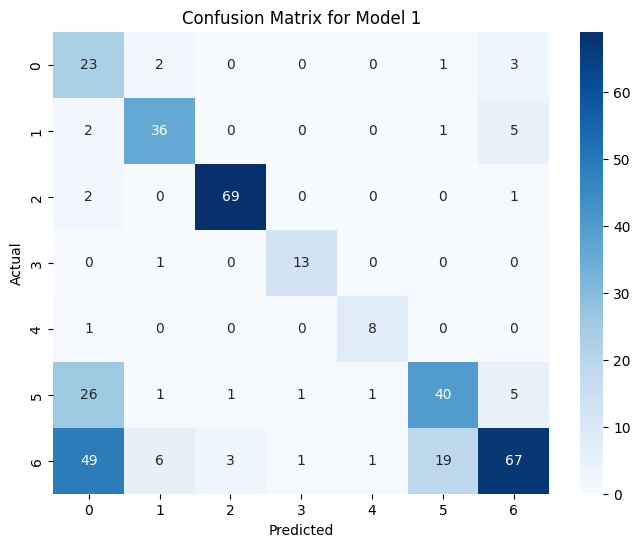

Evaluation for Model 2:
              precision    recall  f1-score   support

           0       0.62      0.17      0.27        29
           1       0.82      0.82      0.82        44
           2       0.95      0.86      0.91        72
           3       0.91      0.71      0.80        14
           4       0.00      0.00      0.00         9
           5       0.54      0.29      0.38        75
           6       0.72      0.35      0.47       146

   micro avg       0.78      0.48      0.59       389
   macro avg       0.65      0.46      0.52       389
weighted avg       0.72      0.48      0.56       389
 samples avg       0.47      0.48      0.47       389



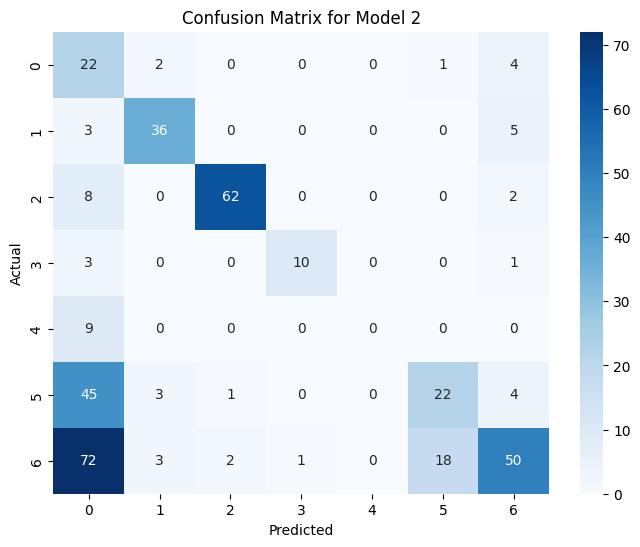

Evaluation for Model 3:
              precision    recall  f1-score   support

           0       0.18      0.93      0.31        29
           1       0.37      0.84      0.51        44
           2       0.87      0.86      0.87        72
           3       0.67      1.00      0.80        14
           4       0.06      1.00      0.12         9
           5       0.26      0.93      0.40        75
           6       0.44      0.94      0.60       146

   micro avg       0.33      0.92      0.49       389
   macro avg       0.41      0.93      0.52       389
weighted avg       0.46      0.92      0.58       389
 samples avg       0.42      0.92      0.54       389



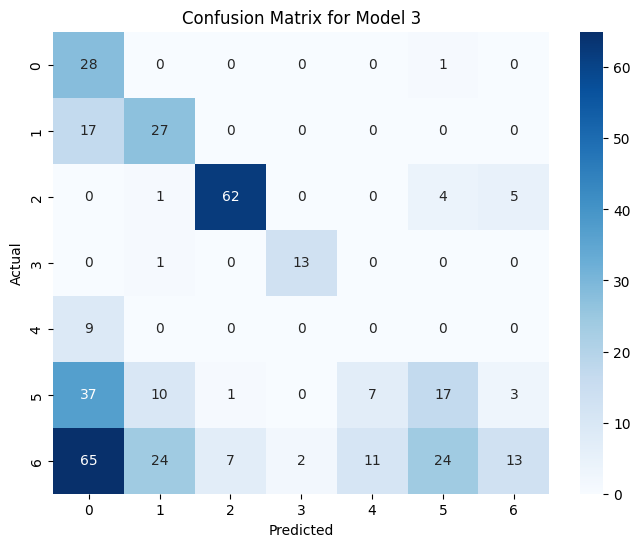

Evaluation for Model 4:
              precision    recall  f1-score   support

           0       0.70      0.48      0.57        29
           1       0.82      0.91      0.86        44
           2       0.91      0.96      0.93        72
           3       0.88      1.00      0.93        14
           4       0.67      0.89      0.76         9
           5       0.56      0.52      0.54        75
           6       0.77      0.52      0.62       146

   micro avg       0.76      0.67      0.71       389
   macro avg       0.76      0.75      0.75       389
weighted avg       0.76      0.67      0.70       389
 samples avg       0.67      0.67      0.67       389



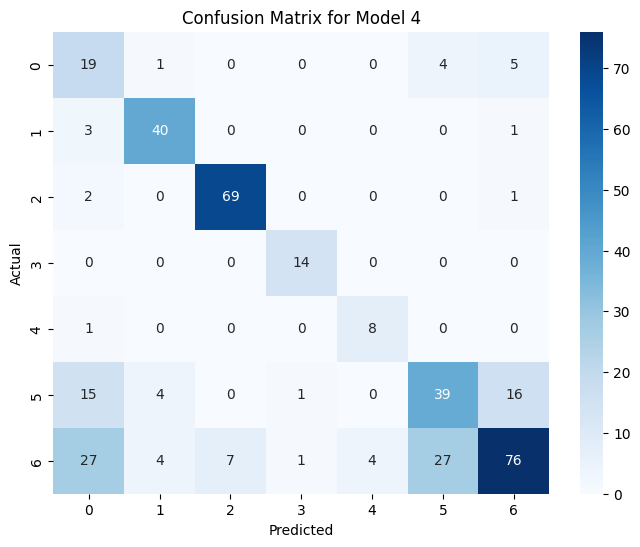

Evaluation for Model 5:
              precision    recall  f1-score   support

           0       0.54      0.48      0.51        29
           1       0.93      0.98      0.96        44
           2       0.92      0.94      0.93        72
           3       0.82      1.00      0.90        14
           4       0.82      1.00      0.90         9
           5       0.64      0.56      0.60        75
           6       0.71      0.66      0.68       146

   micro avg       0.76      0.74      0.75       389
   macro avg       0.77      0.80      0.78       389
weighted avg       0.75      0.74      0.74       389
 samples avg       0.69      0.74      0.70       389



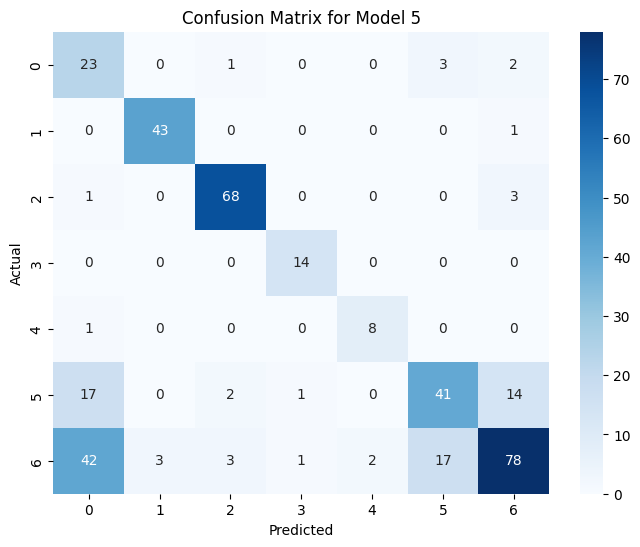

Evaluation for Model 6:
              precision    recall  f1-score   support

           0       1.00      0.38      0.55        29
           1       0.95      0.84      0.89        44
           2       0.99      0.97      0.98        72
           3       0.93      0.93      0.93        14
           4       1.00      0.89      0.94         9
           5       0.76      0.49      0.60        75
           6       0.84      0.60      0.70       146

   micro avg       0.89      0.68      0.77       389
   macro avg       0.92      0.73      0.80       389
weighted avg       0.88      0.68      0.76       389
 samples avg       0.68      0.68      0.68       389



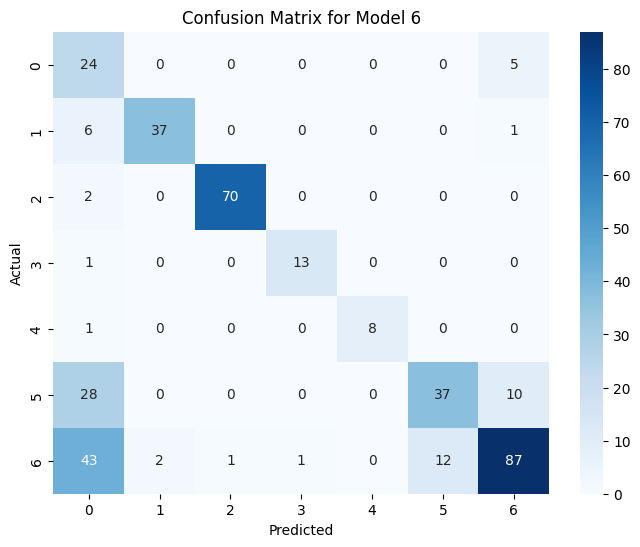

Evaluation for Model 7:
              precision    recall  f1-score   support

           0       1.00      0.21      0.34        29
           1       0.81      0.86      0.84        44
           2       0.97      0.92      0.94        72
           3       0.88      1.00      0.93        14
           4       0.00      0.00      0.00         9
           5       0.63      0.43      0.51        75
           6       0.78      0.40      0.53       146

   micro avg       0.82      0.55      0.66       389
   macro avg       0.72      0.54      0.58       389
weighted avg       0.79      0.55      0.62       389
 samples avg       0.55      0.55      0.55       389



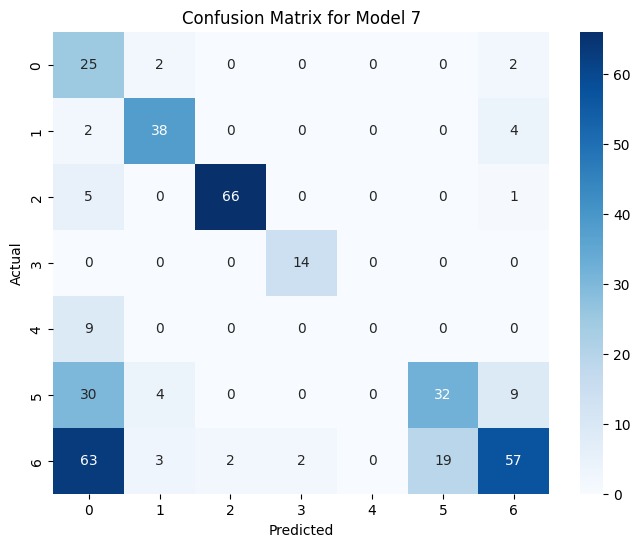

In [64]:
import seaborn as sns
from sklearn.metrics import roc_curve

for i, m in enumerate(mlist):
    predictions = m.predict(Xtest)
    print(f"Evaluation for Model {i+1}:")
    print(classification_report(ytest, predictions))

    cm = confusion_matrix(ytest.values.argmax(axis=1), predictions.argmax(axis=1))
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix for Model {i+1}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


[0.6118251928020566, 0.4652956298200514, 0.1928020565552699, 0.6683804627249358, 0.6375321336760925, 0.6735218508997429, 0.5475578406169666]


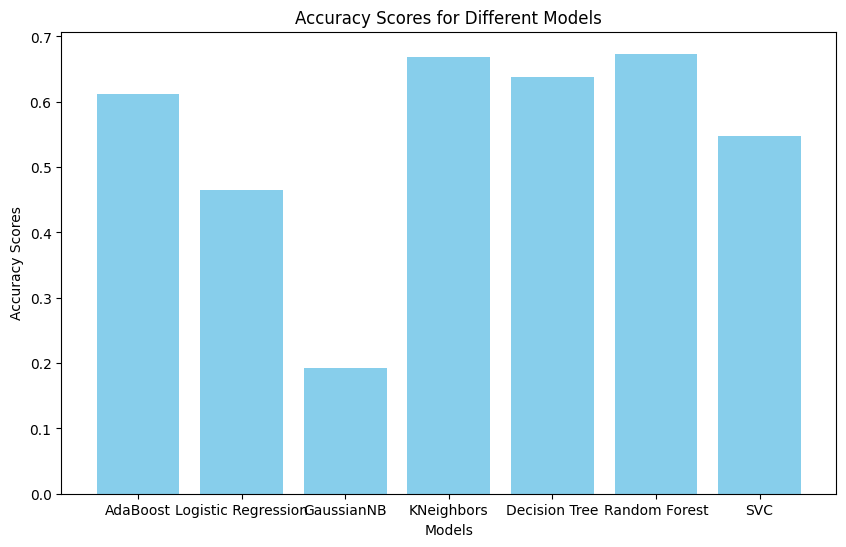

In [75]:
from sklearn.metrics import accuracy_score

accuracy_scores = []
for i, m in enumerate(mlist):
    predictions = m.predict(Xtest)
    accuracy = accuracy_score(ytest, predictions)
    accuracy_scores.append(accuracy)

print(accuracy_scores)

import matplotlib.pyplot as plt

accuracy_scores = []
model_names = ['AdaBoost', 'Logistic Regression', 'GaussianNB', 'KNeighbors', 'Decision Tree', 'Random Forest', 'SVC']

for i, m in enumerate(mlist):
    predictions = m.predict(Xtest)
    accuracy = accuracy_score(ytest, predictions)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy Scores')
plt.title('Accuracy Scores for Different Models')
plt.show()


### Algorithm, Hyperparameter Tuning

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV

In [90]:
# Ensure x_train and y_train are defined
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

params = {
    'random_state': [0, 1, 2, 3, 4, 5],
    'n_estimators': [10, 20, 30, 40, 50, 100],
    'criterion': ['entropy']
}


In [91]:

rf = RandomForestClassifier()
grid = GridSearchCV(rf, param_grid=params, cv=5, scoring='accuracy')
grid.fit(x_train, y_train)
y_pred = grid.predict(x_test)

# Print best parameters and best score
print("Best Parameters: ", grid.best_params_)
print("Best Score: ", grid.best_score_)

Best Parameters:  {'criterion': 'entropy', 'n_estimators': 100, 'random_state': 0}
Best Score:  0.6797365418525049


ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (7).

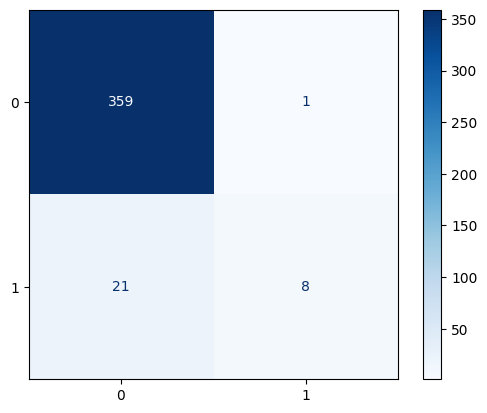

In [102]:
from sklearn.metrics import multilabel_confusion_matrix

labels = y_test.columns

# Visualize the confusion matrix
cm = multilabel_confusion_matrix(y_test, y_pred)
for i, c in enumerate(cm):
    disp = ConfusionMatrixDisplay(confusion_matrix=c, display_labels=labels)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix for Label {i+1}")
    plt.show()

### Deployment

In [105]:
import joblib
joblib.dump(grid, 'classifier.model')
joblib.dump(scaler, 'scaler.model')
X.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas'],
      dtype='object')